# Estimate leakage severity as a function of radius

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import leakagelib

>>> PyXSPEC is not installed, you will no be able to use it.


This code plots the leakage severity as a function of radius. To start, we'll create a model point source and get the sky calibrated PSF. We'll assume Moments data, and use the PSF at position angle zero.

In [17]:
DETECTOR = 3
SOURCE_SIZE = 101 # Pixels
PIXEL_SIZE = 1 # arcsec. Since we aren't using data, it's OK to make it this small
USE_NN = False

source = leakagelib.Source.delta(USE_NN, SOURCE_SIZE, PIXEL_SIZE)
psf = leakagelib.PSF.sky_cal(DETECTOR, source, 0)

The next step is to get the normalized leakage patterns. We'll use a sample power-law spectrum.

In [18]:
spectrum = leakagelib.Spectrum.from_power_law_index(2)
pred_i, q_norm, u_norm = source.compute_leakage(psf, spectrum, normalize=True)

>>> Using cached xEffectiveArea object at /opt/homebrew/anaconda3/lib/python3.12/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim20240101_v013.arf...


These leakage images are the raw Q and U patterns of the events. If we started to extract physical polarizations, we would divide by mu. So let's do that.

In [19]:
q_norm_div, u_norm_div = source.divide_by_mu(q_norm, u_norm, spectrum)
pd_image = np.sqrt(q_norm_div**2 + u_norm_div**2)

Let's view that image

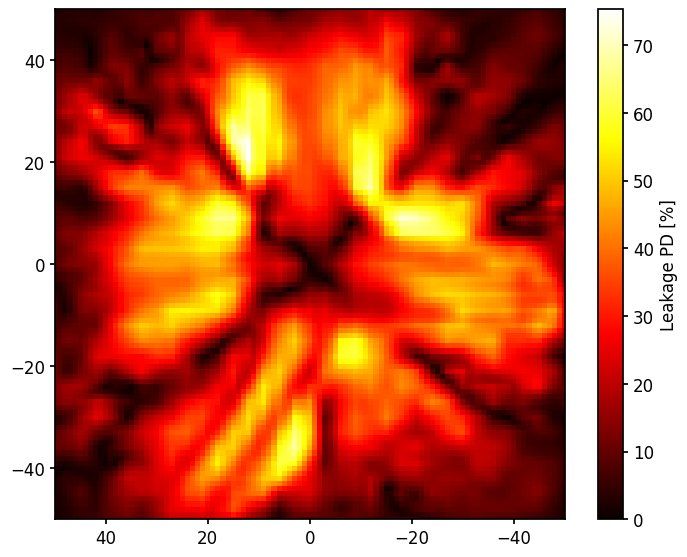

In [20]:
fig, ax = plt.subplots()
c = ax.pcolormesh(source.pixel_centers, source.pixel_centers, np.transpose(pd_image)*100, vmin=0)
ax.set_xlim(50,-50)
ax.set_ylim(-50, 50)
ax.set_aspect("equal")
fig.colorbar(c, label="Leakage PD [%]")

Now we plot the PD as a function of radius. 

Text(0.5, 1.0, 'Moments')

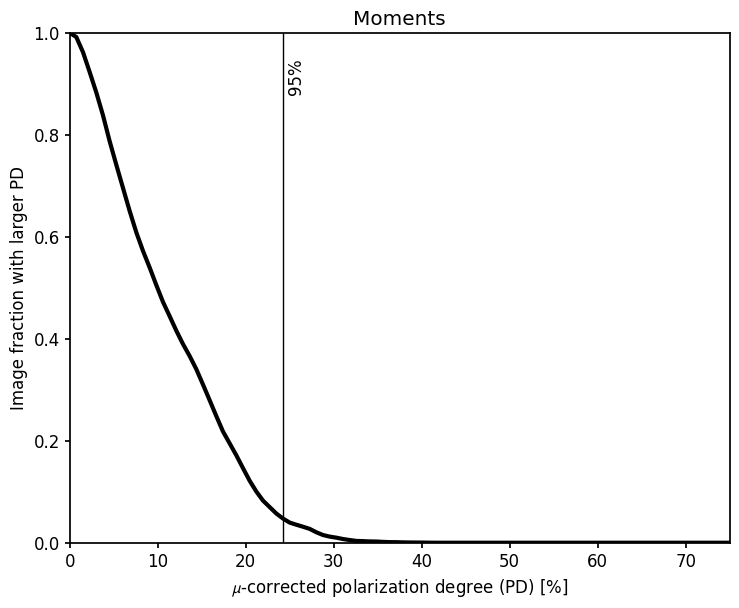

In [25]:
fig, ax = plt.subplots()    
pd_bins = np.linspace(0, 75, 100)
output = []
line_drawn = False
for pd in pd_bins:
    polarized_fraction = np.mean(pd_image * 100 > pd)
    output.append(polarized_fraction)
    if polarized_fraction < 0.05 and not line_drawn:
        ax.axvline(pd, color='k', lw=1)
        line_drawn = True
        ax.text(pd+0.5, 0.95, f"95%", ha='left', va='top', rotation=90)
ax.plot(pd_bins, output, lw=3, color='k')

ax.set_ylim(0, 1)
ax.set_xlim(pd_bins[0], pd_bins[-1])
ax.set_xlabel("$\\mu$-corrected polarization degree (PD) [%]")
ax.set_ylabel("Image fraction with larger PD")
ax.set_title("Moments")

You can try going back and changing detectors or the analysis methods. For example: neural nets give much less leakage.

>>> Using cached xEffectiveArea object at /opt/homebrew/anaconda3/lib/python3.12/site-packages/ixpeobssim/caldb/ixpe/gpd/cpf/arf/ixpe_d1_obssim20240101_v013.arf...


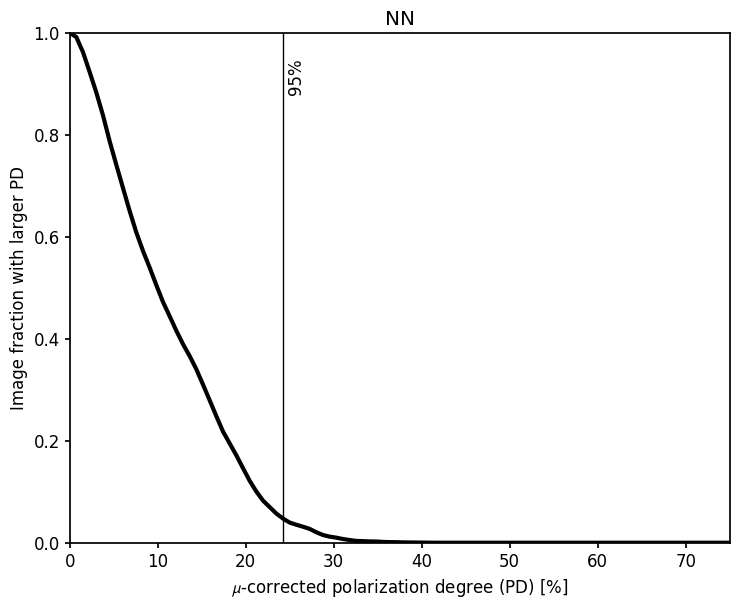

In [26]:
source = leakagelib.Source.delta(True, SOURCE_SIZE, PIXEL_SIZE)
spectrum = leakagelib.Spectrum.from_power_law_index(2)
pred_i, q_norm, u_norm = source.compute_leakage(psf, spectrum, normalize=True)
q_norm_div, u_norm_div = source.divide_by_mu(q_norm, u_norm, spectrum)
pd_image = np.sqrt(q_norm_div**2 + u_norm_div**2)
fig, ax = plt.subplots()    
pd_bins = np.linspace(0, 75, 100)
output = []
line_drawn = False
for pd in pd_bins:
    polarized_fraction = np.mean(pd_image * 100 > pd)
    output.append(polarized_fraction)
    if polarized_fraction < 0.05 and not line_drawn:
        ax.axvline(pd, color='k', lw=1)
        line_drawn = True
        ax.text(pd+0.5, 0.95, f"95%", ha='left', va='top', rotation=90)
ax.plot(pd_bins, output, lw=3, color='k')

ax.set_ylim(0, 1)
ax.set_xlim(pd_bins[0], pd_bins[-1])
ax.set_xlabel("$\\mu$-corrected polarization degree (PD) [%]")
ax.set_ylabel("Image fraction with larger PD")
ax.set_title("NN");